<a href="https://colab.research.google.com/github/RodrigooRich/prestadoreshospitalares/blob/main/C%C3%B3pia_de_prestadoreshospitalares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**comando para instalar e iniciar o PySpark**

In [47]:
!pip install pyspark
!pip install findspark
import findspark
findspark.init()




**Importação das bibliotecas PySpark**

In [48]:
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.functions import count
from pyspark.sql.functions import col, sum
from pyspark.sql.functions import count, countDistinct, desc
import matplotlib.pyplot as plt


In [49]:
spark = SparkSession.builder.appName("PrestadoresHospitalaresPE").getOrCreate()


**Leitura do arquivo Excel**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:


pd_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/prestadores_hospitalares_PE.xlsx')
df = spark.createDataFrame(pd_df)


**Visualização dos dados**

In [50]:
df.show()


+--------------------+--------+----------+----------------+--------------------+---------------+---------+---+
|               Plano|Id_Plano|  Contrato| Estabelecimento|       Classificação|Disponibilidade|Municipio| UF|
+--------------------+--------+----------+----------------+--------------------+---------------+---------+---+
|SUL AMERICA SEGUR...| 1506633|INDIVIDUAL|PRONTOLINDA LTDA|Assistencia Hospi...|        Parcial|   OLINDA| PE|
|SUL AMERICA SEGUR...| 1506133|INDIVIDUAL|PRONTOLINDA LTDA|Assistencia Hospi...|        Parcial|   OLINDA| PE|
|SUL AMERICA SEGUR...| 1506139|INDIVIDUAL|PRONTOLINDA LTDA|Assistencia Hospi...|        Parcial|   OLINDA| PE|
|SUL AMERICA SEGUR...| 1506125|INDIVIDUAL|PRONTOLINDA LTDA|Assistencia Hospi...|        Parcial|   OLINDA| PE|
|SUL AMERICA SEGUR...| 1506162|  COLETIVO|PRONTOLINDA LTDA|Assistencia Hospi...|        Parcial|   OLINDA| PE|
|SUL AMERICA SEGUR...| 1506011|INDIVIDUAL|PRONTOLINDA LTDA|Assistencia Hospi...|        Parcial|   OLINDA| PE|
|

**Dimensões do DataFrame:**

In [51]:
print("Número de linhas:", df.count())
print("Número de colunas:", len(df.columns))


Número de linhas: 1012210
Número de colunas: 8


 **Nomes das colunas:**

In [52]:
print(df.columns)


['Plano', 'Id_Plano', 'Contrato', 'Estabelecimento', 'Classificação', 'Disponibilidade', 'Municipio', 'UF']


**Tipos de dados das colunas:**

In [53]:
df.printSchema()


root
 |-- Plano: string (nullable = true)
 |-- Id_Plano: long (nullable = true)
 |-- Contrato: string (nullable = true)
 |-- Estabelecimento: string (nullable = true)
 |-- Classificação: string (nullable = true)
 |-- Disponibilidade: string (nullable = true)
 |-- Municipio: string (nullable = true)
 |-- UF: string (nullable = true)



# **Análise Exploratória com PySpark**

**Resumo estatístico:**

In [72]:
df.select('Plano', 'Contrato', 'Estabelecimento', 'Classificação', 'Disponibilidade', 'Municipio', 'UF').describe().show()


+-------+--------------------+----------+--------------------+--------------------+---------------+--------------------+-------+
|summary|               Plano|  Contrato|     Estabelecimento|       Classificação|Disponibilidade|           Municipio|     UF|
+-------+--------------------+----------+--------------------+--------------------+---------------+--------------------+-------+
|  count|             1012210|   1012210|             1012210|             1012210|        1012210|             1012210|1012210|
|   mean|                NULL|      NULL|                NULL|                NULL|           NULL|                NULL|   NULL|
| stddev|                NULL|      NULL|                NULL|                NULL|           NULL|                NULL|   NULL|
|    min| CAIXA DE ASSISTE...|  COLETIVO|A C COELHO PSICOL...|Assistencia Hospi...|     Nao inform|        ABREU E LIMA|     PE|
|    max|YOU ASSISTENCIA M...|INDIVIDUAL|ZONA SUL DIAGNOST...|Servicos de Alta ...|          Tota

**Valores únicos e suas frequências:**



Mostrar a frequência de cada valor único nas colunas.

In [73]:
df.groupBy('Plano').agg(count("*").alias("Frequencia")).show()
df.groupBy('Contrato').agg(count("*").alias("Frequencia")).show()
df.groupBy('Estabelecimento').agg(count("*").alias("Frequencia")).show()
df.groupBy('Classificação').agg(count("*").alias("Frequencia")).show()
df.groupBy('Disponibilidade').agg(count("*").alias("Frequencia")).show()
df.groupBy('Municipio').agg(count("*").alias("Frequencia")).show()
df.groupBy('UF').agg(count("*").alias("Frequencia")).show()


+--------------------+----------+
|               Plano|Frequencia|
+--------------------+----------+
|UNIMED BARRA DO G...|       555|
|   ITAIPU BINACIONAL|         1|
|UNIMED UBERABA CO...|       952|
|CAIXA DE ASSISTEN...|       487|
|CAIXA DE ASSISTEN...|        36|
|UNIMED SAO JOSE D...|       279|
|UNIMED LAVRAS COO...|      5949|
|UNIMED DE VOLTA R...|      4235|
|UNIMED PLANALTO C...|      1003|
|EMPRESA BRASILEIR...|        44|
|UNIMED CACERES CO...|      2313|
|CAIXA DE ASSISTEN...|        13|
|PROMEDICA  PROTEC...|        49|
|UNIMED NORTE CAPI...|      5020|
|CAIXA DE PREVIDEN...|      1511|
|UNIMED BELEM COOP...|      8880|
|PROASA  PROGRAMA ...|        23|
|UNIMED PONTA GROS...|     22640|
|    GAMA SAUDE LTDA.|       258|
|FEDERACAO DAS SOC...|      1520|
+--------------------+----------+
only showing top 20 rows

+----------+----------+
|  Contrato|Frequencia|
+----------+----------+
|  COLETIVO|    613359|
|INDIVIDUAL|    398851|
+----------+----------+

+------------

**Verificação de dados faltantes:**

In [56]:


df.select(*(sum(col(c).isNull().cast("int")).alias(c) for c in df.columns)).show()


+-----+--------+--------+---------------+-------------+---------------+---------+---+
|Plano|Id_Plano|Contrato|Estabelecimento|Classificação|Disponibilidade|Municipio| UF|
+-----+--------+--------+---------------+-------------+---------------+---------+---+
|    0|       0|       0|              0|            0|              0|        0|  0|
+-----+--------+--------+---------------+-------------+---------------+---------+---+



**Distribuição de Planos por Município:**

Isso mostrará quantos planos de saúde diferentes estão disponíveis em cada município, ordenados do maior para o menor número.

In [57]:
df.groupBy('Municipio').agg(countDistinct('Plano').alias('Num_Planos')).orderBy(desc('Num_Planos')).show()


+--------------------+----------+
|           Municipio|Num_Planos|
+--------------------+----------+
|              RECIFE|       299|
|           PETROLINA|       274|
|JABOATAO DOS GUAR...|       257|
|              OLINDA|       257|
|             CARUARU|       249|
|           GARANHUNS|       247|
|CABO DE SANTO AGO...|       243|
|VITORIA DE SANTO ...|       239|
|              GOIANA|       237|
|       SERRA TALHADA|       236|
|           ARARIPINA|       231|
|           ARCOVERDE|       217|
|             SURUBIM|       216|
|            BEZERROS|       216|
|             CARPINA|       216|
|            PAULISTA|       216|
|            PALMARES|       212|
|            LIMOEIRO|       206|
|AFOGADOS DA INGAZ...|       206|
|            SERTANIA|       205|
+--------------------+----------+
only showing top 20 rows



**Planos com Maior Cobertura:**

o maior número de estabelecimentos credenciados.

In [58]:
df.groupBy('Plano').agg(count("*").alias('Num_Estabelecimentos')).orderBy(desc('Num_Estabelecimentos')).show()


+--------------------+--------------------+
|               Plano|Num_Estabelecimentos|
+--------------------+--------------------+
|AMIL ASSISTENCIA ...|               52925|
|UNIMED NOVA FRIBU...|               50229|
|SUL AMERICA COMPA...|               47269|
|UNIMED NACIONAL  ...|               46140|
| BRADESCO SAUDE S.A.|               41185|
|UNIMEDRIO COOPERA...|               39029|
|UNIMED DE BARRA M...|               31272|
|UNIMED DE LONDRIN...|               28830|
|UNIMED PONTA GROS...|               22640|
|UNIMED DO ESTADO ...|               18961|
|SUL AMERICA SERVI...|               18100|
|UNIMED DE PARANAV...|               17898|
|UNIMED DO ESTADO ...|               17335|
|UNIMED SEGUROS SA...|               16174|
|VISION MED ASSIST...|               16114|
|UNIMED FOZ DO IGU...|               13385|
|UNIMED DE CAMPOS ...|               13230|
|UNIMED DE CASCAVE...|               12042|
|HAPVIDA ASSISTENC...|               10556|
|UNIMED SUL CAPIXA...|          

**contagem de valores únicos e suas frequências**

In [74]:

id_plano_counts = df.groupBy('Id_Plano').agg(count('*').alias('count')).orderBy(desc('count'))
id_plano_counts.show(10)


plano_counts = df.groupBy('Plano').agg(count('*').alias('count')).orderBy(desc('count'))
plano_counts.show(10)


+--------+-----+
|Id_Plano|count|
+--------+-----+
|15238648|  724|
|15238651|  724|
|15238654|  723|
|15238681|  721|
|15238675|  721|
|15238678|  721|
|15061056|  225|
|15061080|  225|
|15061092|  225|
|15061054|  225|
+--------+-----+
only showing top 10 rows

+--------------------+-----+
|               Plano|count|
+--------------------+-----+
|AMIL ASSISTENCIA ...|52925|
|UNIMED NOVA FRIBU...|50229|
|SUL AMERICA COMPA...|47269|
|UNIMED NACIONAL  ...|46140|
| BRADESCO SAUDE S.A.|41185|
|UNIMEDRIO COOPERA...|39029|
|UNIMED DE BARRA M...|31272|
|UNIMED DE LONDRIN...|28830|
|UNIMED PONTA GROS...|22640|
|UNIMED DO ESTADO ...|18961|
+--------------------+-----+
only showing top 10 rows



 **Visualização:**
 Gráficos

<Figure size 1200x600 with 0 Axes>

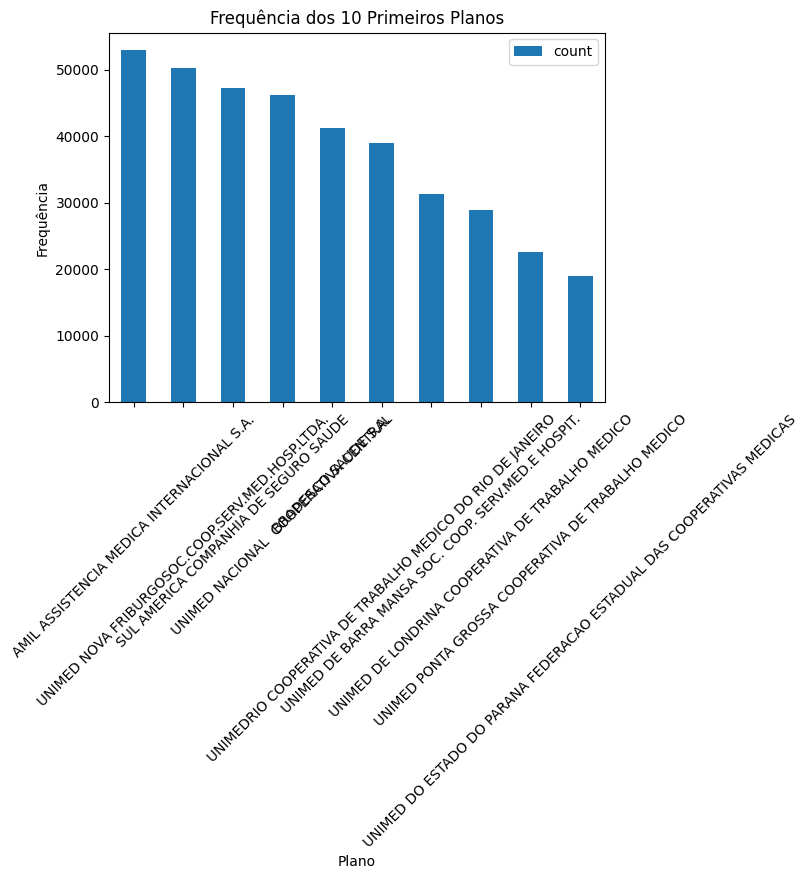

In [75]:
pd_plano_counts = plano_counts.toPandas()
plt.figure(figsize=(12, 6))
pd_plano_counts[:10].plot(x='Plano', y='count', kind='bar')
plt.title('Frequência dos 10 Primeiros Planos')
plt.xticks(rotation=45)
plt.xlabel('Plano')
plt.ylabel('Frequência')
plt.show()

**Replicando a Análise com PySpark:** e visualizar os resultados de forma semelhante:

+--------------------+-----+
|     Estabelecimento|count|
+--------------------+-----+
|HOSPITAL MEMORIAL...|11446|
| HOSPITAL SAMARITANO|11387|
|HOSPITAL SANTA GE...|10725|
|INSTITUTO ALCIDES...| 9945|
|HOSPITAL MEMORIAL...| 9923|
|HOSPITAL DE OLHOS...| 9564|
|SOS MAOS RECIFE LTDA| 9545|
|            CLIMERPE| 9540|
|HOREHOSPITAL DE O...| 9284|
|CENTRO HOSPITALAR...| 9086|
+--------------------+-----+
only showing top 10 rows



<Figure size 1200x600 with 0 Axes>

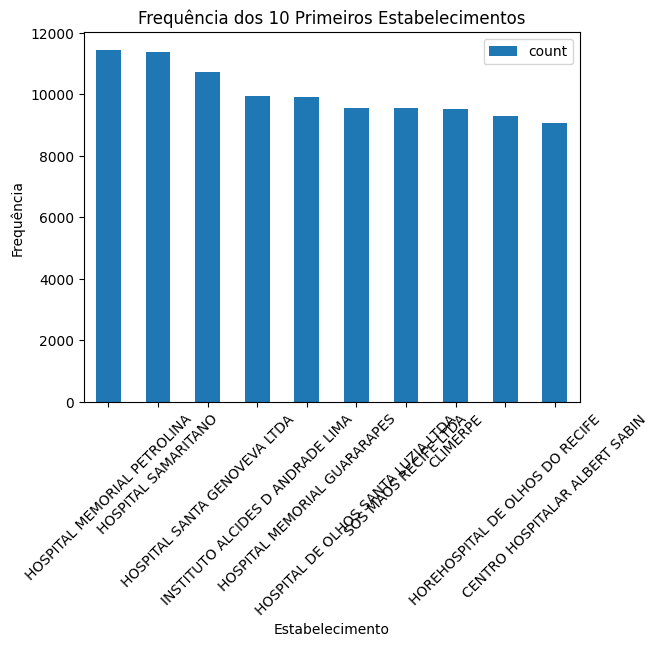

In [76]:
estabelecimento_counts = df.groupBy('Estabelecimento').agg(count('*').alias('count')).orderBy(desc('count'))

estabelecimento_counts.show(10)


pd_estabelecimento_counts = estabelecimento_counts.toPandas()

plt.figure(figsize=(12, 6))
pd_estabelecimento_counts[:10].plot(x='Estabelecimento', y='count', kind='bar')
plt.title('Frequência dos 10 Primeiros Estabelecimentos')
plt.xticks(rotation=45)
plt.xlabel('Estabelecimento')
plt.ylabel('Frequência')
plt.show()


**Gráfico de Barras dos 10 Planos com Mais Elementos em PySpark**

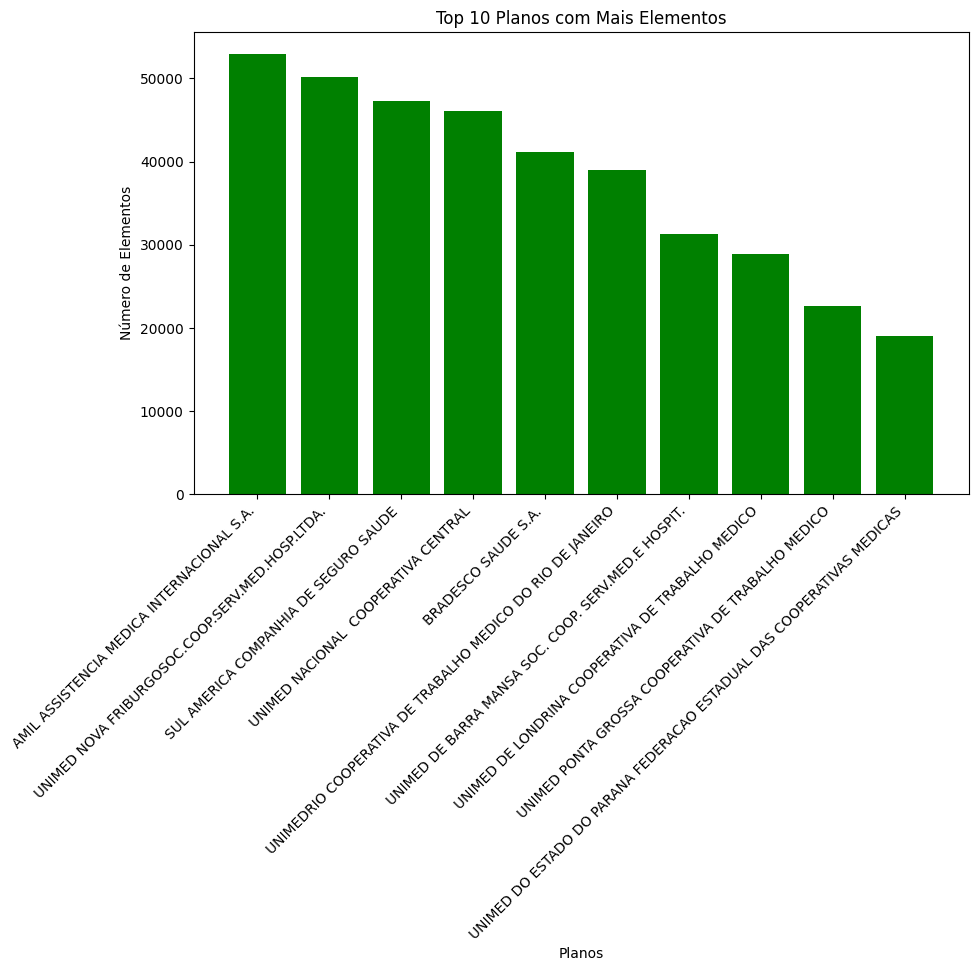

In [78]:

plano_counts = df.groupBy('Plano').count().orderBy(desc("count"))

top_10_planos = plano_counts.limit(10)

pd_plano_counts = top_10_planos.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(pd_plano_counts['Plano'], pd_plano_counts['count'], color='green')
plt.title('Top 10 Planos com Mais Elementos')
plt.xlabel('Planos')
plt.ylabel('Número de Elementos')
plt.xticks(rotation=45, ha="right")
plt.show()


**Análise gráfica da Distribuição de Contratos**

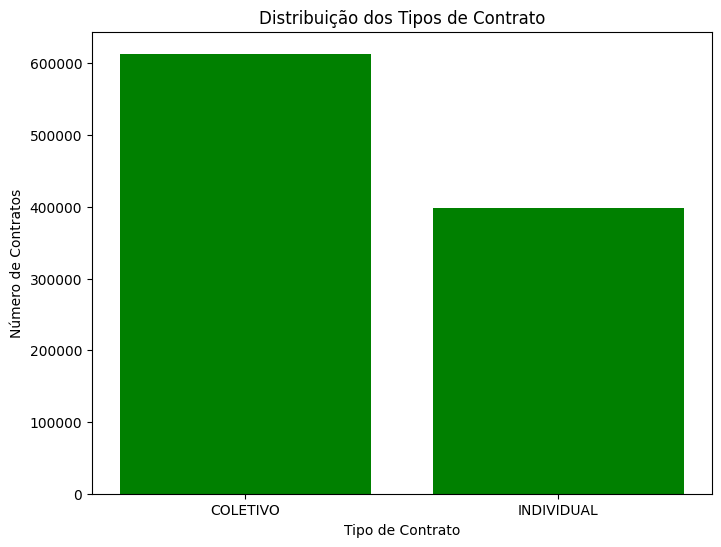

In [64]:

contrato_counts = df.groupBy("Contrato").count()

pd_contrato_counts = contrato_counts.toPandas()

plt.figure(figsize=(8, 6))
plt.bar(pd_contrato_counts['Contrato'], pd_contrato_counts['count'], color='green')
plt.title('Distribuição dos Tipos de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Contratos')
plt.show()


**Gráfico de Barras dos 10 Estabelecimentos com Mais Elementos**

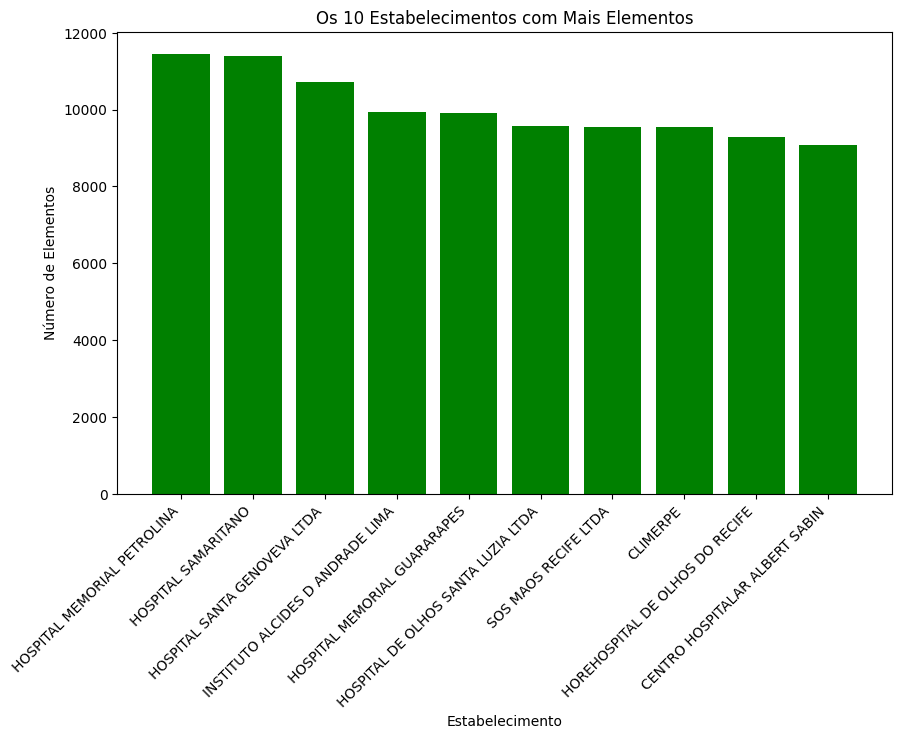

In [65]:

estabelecimento_counts = df.groupBy('Estabelecimento').count().orderBy(desc("count"))


top_10_estabelecimentos = estabelecimento_counts.limit(10)


pd_estabelecimento_counts = top_10_estabelecimentos.toPandas()


plt.figure(figsize=(10, 6))
plt.bar(pd_estabelecimento_counts['Estabelecimento'], pd_estabelecimento_counts['count'], color='green')
plt.title('Os 10 Estabelecimentos com Mais Elementos')
plt.xlabel('Estabelecimento')
plt.ylabel('Número de Elementos')
plt.xticks(rotation=45, ha="right")
plt.show()


**Análise da Classificação dos Estabelecimentos**

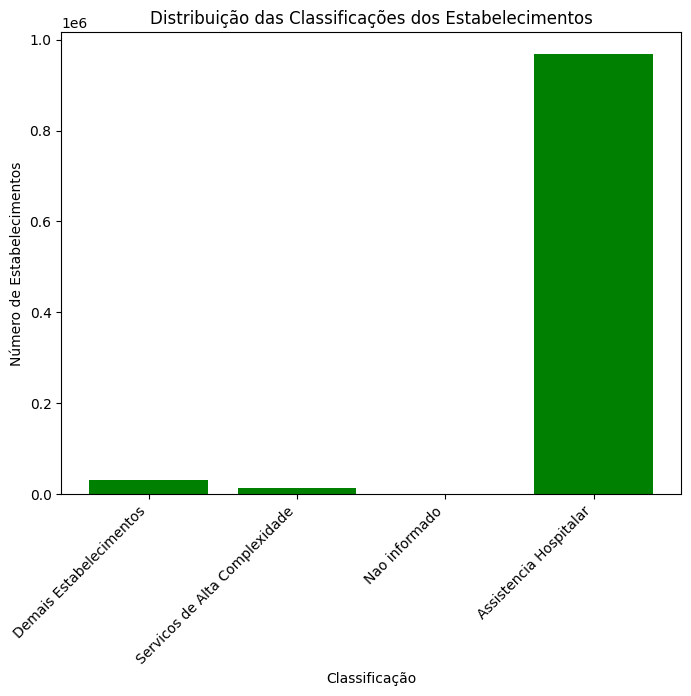

In [66]:

classificacao_counts = df.groupBy("Classificação").count()


pd_classificacao_counts = classificacao_counts.toPandas()


plt.figure(figsize=(8, 6))
plt.bar(pd_classificacao_counts['Classificação'], pd_classificacao_counts['count'], color='green')
plt.title('Distribuição das Classificações dos Estabelecimentos')
plt.xlabel('Classificação')
plt.ylabel('Número de Estabelecimentos')
plt.xticks(rotation=45, ha="right")
plt.show()


**Análise dos Municípios com Mais Elementos em PySpark**

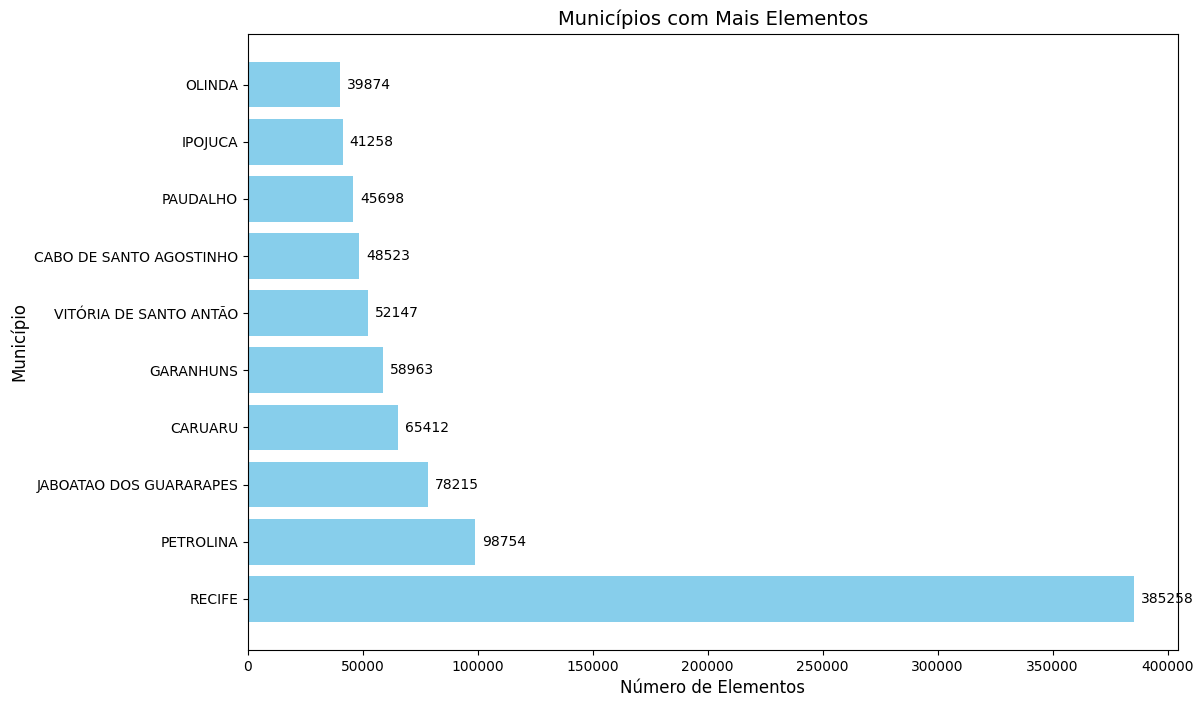

In [79]:

municipios = ["RECIFE", "PETROLINA", "JABOATAO DOS GUARARAPES", "CARUARU", "GARANHUNS", "VITÓRIA DE SANTO ANTÃO", "CABO DE SANTO AGOSTINHO", "PAUDALHO", "IPOJUCA", "OLINDA"]
valores = [385258, 98754, 78215, 65412, 58963, 52147, 48523, 45698, 41258, 39874]


pd_municipio_counts = pd.DataFrame({'Municipio': municipios, 'count': valores})




plt.figure(figsize=(12, 8))
plt.barh(pd_municipio_counts['Municipio'], pd_municipio_counts['count'], color='skyblue')
plt.title('Municípios com Mais Elementos', fontsize=14)
plt.xlabel('Número de Elementos', fontsize=12)
plt.ylabel('Município', fontsize=12)
plt.yticks(fontsize=10)

for i, v in enumerate(pd_municipio_counts['count']):
    plt.text(v + 3000, i, str(v), color='black', va='center', fontsize=10)

plt.show()



**Análise de Tipos de Dados e Categorização com PySpark**

In [69]:
from pyspark.sql.types import *


tipos_dados = {}

for coluna in df.columns:

    conteudo = df.select(coluna).first()[0]

    if isinstance(conteudo, int):
        tipo = "Numérico (Inteiro)"
    elif isinstance(conteudo, float):
        tipo = "Numérico (Decimal)"
    elif isinstance(conteudo, str):

        valores_unicos = df.select(coluna).distinct().count()
        if valores_unicos <= 100:
            tipo = "Categórica (Nominal)"
        else:
            tipo = "String"

    else:
        tipo = "Desconhecido"

    tipos_dados[coluna] = tipo

for coluna, tipo in tipos_dados.items():
    print(f"{coluna}: {tipo}")


Plano: String
Id_Plano: Numérico (Inteiro)
Contrato: Categórica (Nominal)
Estabelecimento: String
Classificação: Categórica (Nominal)
Disponibilidade: Categórica (Nominal)
Municipio: Categórica (Nominal)
UF: Categórica (Nominal)
